In [1]:
%matplotlib inline
import numpy as np
import pywt
import h5py

import matplotlib.pyplot as plt

In [2]:
path = 'unlabeled-elm-events/elm-events.hdf5'
with h5py.File(path, 'r') as hf:
    ids = list(hf.keys())
    first_elm_id = ids[0]
    second_elm_id = ids[1]
    first_elm = np.array(hf[first_elm_id]['signals'])
    second_elm = np.array(hf[second_elm_id]['signals'])
first_elm = first_elm.T
second_elm = second_elm.T

In [3]:
max_scale = 1024
num = int(np.log2(max_scale)) + 1
widths = np.round(
    np.geomspace(1, max_scale, num=num, endpoint=True)
).astype(int)
first_elm_cwt, _ = pywt.cwt(first_elm, scales=widths, wavelet="morl", axis=0)
first_elm_cwt = np.transpose(first_elm_cwt, (1, 0, 2))

second_elm_cwt, _ = pywt.cwt(second_elm, scales=widths, wavelet="morl", axis=0)
second_elm_cwt = np.transpose(second_elm_cwt, (1, 0, 2))

In [4]:
first_elm_cwt_ch0 = first_elm_cwt[:, :, 0]
second_elm_cwt_ch0 = second_elm_cwt[:, :, 0]

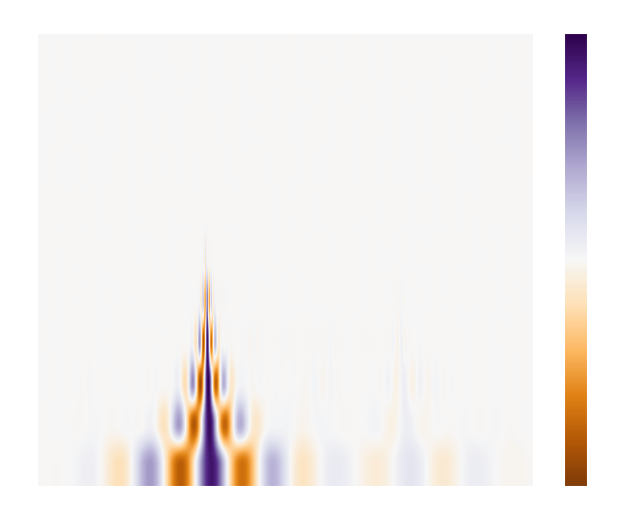

In [5]:
plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(
    first_elm_cwt_ch0.T,
    cmap="PuOr",
    aspect="auto",
    vmax=abs(first_elm_cwt_ch0).max(),
    vmin=-abs(first_elm_cwt_ch0).max(),
)
plt.colorbar()
plt.title('BES Ch:1', fontsize=14);

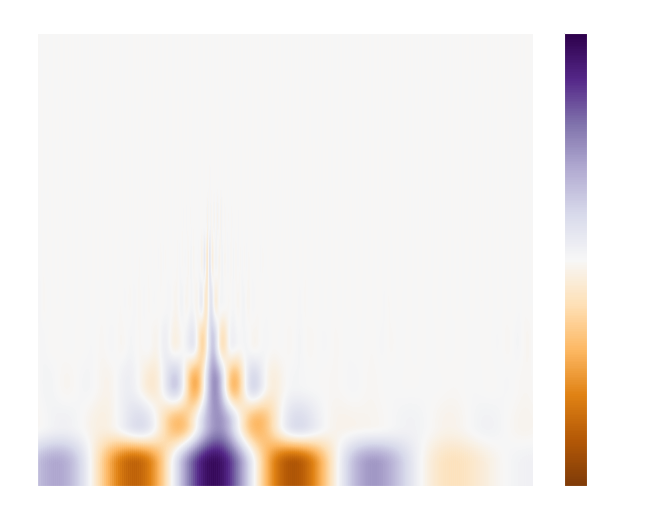

In [6]:
plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(
    second_elm_cwt_ch0.T,
    cmap="PuOr",
    aspect="auto",
    vmax=abs(second_elm_cwt_ch0).max(),
    vmin=-abs(second_elm_cwt_ch0).max(),
)
plt.colorbar()
plt.title('BES Ch:1', fontsize=14);

In [7]:
signal_combined = np.concatenate([first_elm, second_elm], axis=0)

signal_combined_cwt, _ = pywt.cwt(signal_combined, scales=widths, wavelet="morl", axis=0)
signal_combined_cwt = np.transpose(signal_combined_cwt, (1, 0, 2))

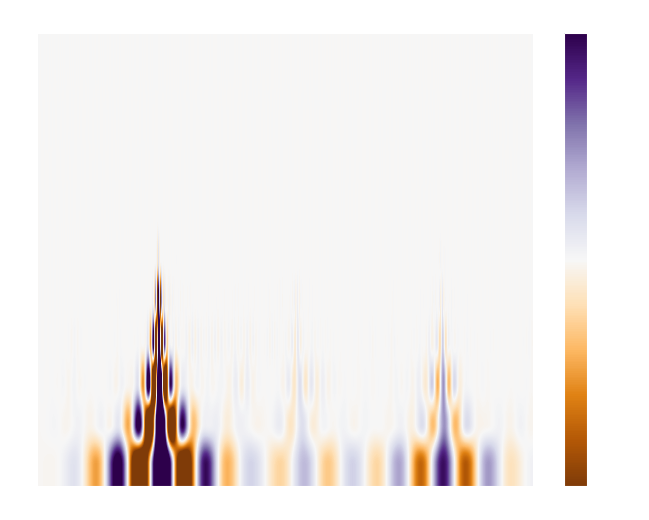

In [8]:
signal_combined_cwt_ch0 = signal_combined_cwt[:, :, 0]

plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(
    signal_combined_cwt_ch0.T,
    cmap="PuOr",
    aspect="auto",
    vmax=abs(second_elm_cwt_ch0).max(),
    vmin=-abs(second_elm_cwt_ch0).max(),
)
plt.colorbar()
plt.title('BES Ch:1', fontsize=14);

In [10]:
first_signal_ch0 = signal_combined_cwt_ch0[:len(first_elm)]
second_signal_ch0 = signal_combined_cwt_ch0[len(first_elm):]

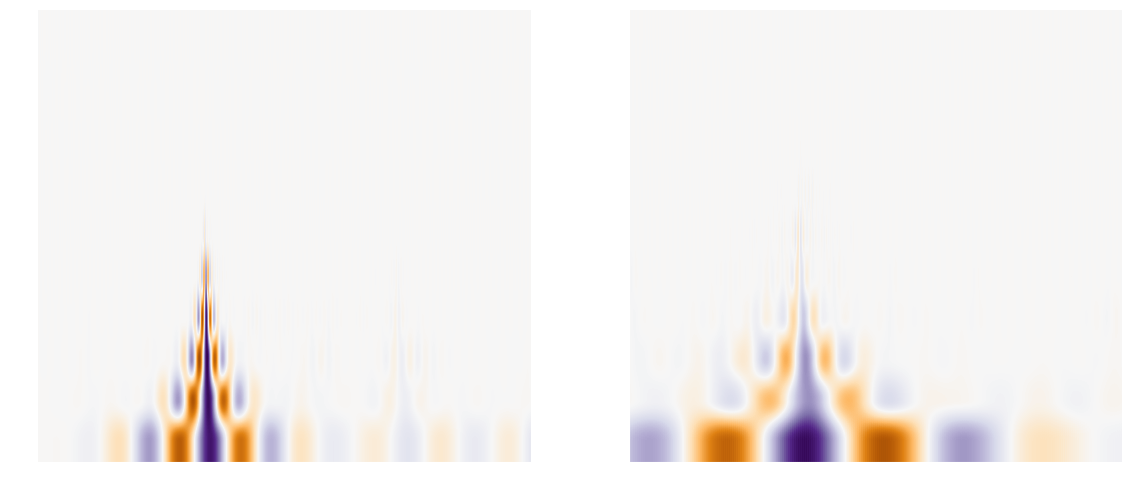

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6), dpi=100)
ax[0].imshow(
    first_signal_ch0.T,
    cmap="PuOr",
    aspect="auto",
    vmax=abs(first_signal_ch0).max(),
    vmin=-abs(first_signal_ch0).max(),
)
ax[1].imshow(
    second_signal_ch0.T,
    cmap="PuOr",
    aspect="auto",
    vmax=abs(second_signal_ch0).max(),
    vmin=-abs(second_signal_ch0).max(),
);